<a href="https://colab.research.google.com/github/WinnieAnyoso/R_Supervised-and-unsupervised/blob/master/w13_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###RESEARCH QUESTION

Kira Plastinina is a Russian brand that is sold through a defunct chain of retail stores in Russia, Ukraine, Kazakhstan, Belarus, China, Philippines, and Armenia. The brand’s Sales and Marketing team would like to understand their customer’s behavior from data that they have collected over the past year. More specifically, they would like to learn the characteristics of customer groups.

Perform clustering stating insights drawn from your analysis and visualizations.
Upon implementation, provide comparisons between the approaches learned this week i.e. K-Means clustering vs Hierarchical clustering highlighting the strengths and limitations of each approach in the context of your analysis. 


###Metrics Of Success

Perform Univariate and bivariate analysis and Kmeans clustering. Challenge the Solution with Hierarchical clustering and get to determine the model with the highest accuracy.

Model with the highest accuracy gets to take the day. 

###Context 
Fashion designers and Companies in general derive their revenue from the sale merchandise that are related to the company's primary operations. However it is also important to note the behaviour and patterns of potential buyers in order to determine areas of improvement and methods that are no longer useful and need to be scrapped out. 

It is also important for companies to take keen interest and be as accurate as possible when it comes to revenue collected to reduce the rate at which false revenues could be incurred. 

###Experimental Design

1. Load the dataset
2. Explore the data i.e. find information and summaries of all the columns 
3. Clean the data i.e. check and deal with missing data, duplicates and outliers in the dataset
4. Perform Univariate and Bivariate analysis. 
5. Implement the solution using Kmeans Clustering
6. Challenge the solution Using Hierarchical Clustering
7. Conclusions and Recommendations 



In [1]:
data <- read.csv("online_shoppers_intention.csv")
head(data)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<fct>,<lgl>,<lgl>
1,0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
2,0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
3,0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
4,0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
5,0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
6,0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


#2. Exploring the dataset 

In [2]:

# different types of pages visited by the visitor in that session and total time spent in each of these page categories.
pages_visited <- data[, c(1,2,3,4,5,6)]
names(pages_visited)

[1] "Administrative"          "Administrative_Duration"
[3] "Informational"           "Informational_Duration" 
[5] "ProductRelated"          "ProductRelated_Duration"

In [3]:
#metrics measured by "Google Analytics" for each page in the e-commerce site.
google_metrics <- data[, c(7,8,9)]
names(google_metrics)

[1] "BounceRates" "ExitRates"   "PageValues"

In [6]:
colnames(data)

[1] "Administrative"          "Administrative_Duration"
 [3] "Informational"           "Informational_Duration" 
 [5] "ProductRelated"          "ProductRelated_Duration"
 [7] "BounceRates"             "ExitRates"              
 [9] "PageValues"              "SpecialDay"             
[11] "Month"                   "OperatingSystems"       
[13] "Browser"                 "Region"                 
[15] "TrafficType"             "VisitorType"            
[17] "Weekend"                 "Revenue"

In [8]:
summary(data)

 Administrative   Administrative_Duration Informational   
 Min.   : 0.000   Min.   :  -1.00         Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.:   0.00         1st Qu.: 0.000  
 Median : 1.000   Median :   8.00         Median : 0.000  
 Mean   : 2.318   Mean   :  80.91         Mean   : 0.504  
 3rd Qu.: 4.000   3rd Qu.:  93.50         3rd Qu.: 0.000  
 Max.   :27.000   Max.   :3398.75         Max.   :24.000  
 NA's   :14       NA's   :14              NA's   :14      
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  7.00   1st Qu.:  185.0        
 Median :   0.00        Median : 18.00   Median :  599.8        
 Mean   :  34.51        Mean   : 31.76   Mean   : 1196.0        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1466.5        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
 NA's   :14             NA's   :14       NA's   :14             
  Bounce

In [9]:
str(data)

'data.frame':	12330 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : Factor w/ 10 levels "Aug","Dec","Feb",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ OperatingSystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : Factor w/ 3 levels "Ne

In [11]:
sapply(data, class)

Administrative Administrative_Duration           Informational 
              "integer"               "numeric"               "integer" 
 Informational_Duration          ProductRelated ProductRelated_Duration 
              "numeric"               "integer"               "numeric" 
            BounceRates               ExitRates              PageValues 
              "numeric"               "numeric"               "numeric" 
             SpecialDay                   Month        OperatingSystems 
              "numeric"                "factor"               "integer" 
                Browser                  Region             TrafficType 
              "integer"               "integer"               "integer" 
            VisitorType                 Weekend                 Revenue 
               "factor"               "logical"               "logical"

#3. Data Cleaning 

###Misssing values

In [13]:

# Total missing values in each column 
# by using the function colSums()

colSums(is.na(data))

Administrative Administrative_Duration           Informational 
                     14                      14                      14 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                     14                      14                      14 
            BounceRates               ExitRates              PageValues 
                     14                      14                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

In [15]:
install.packages("naniar")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gridExtra’, ‘plyr’, ‘visdat’, ‘viridis’, ‘UpSetR’




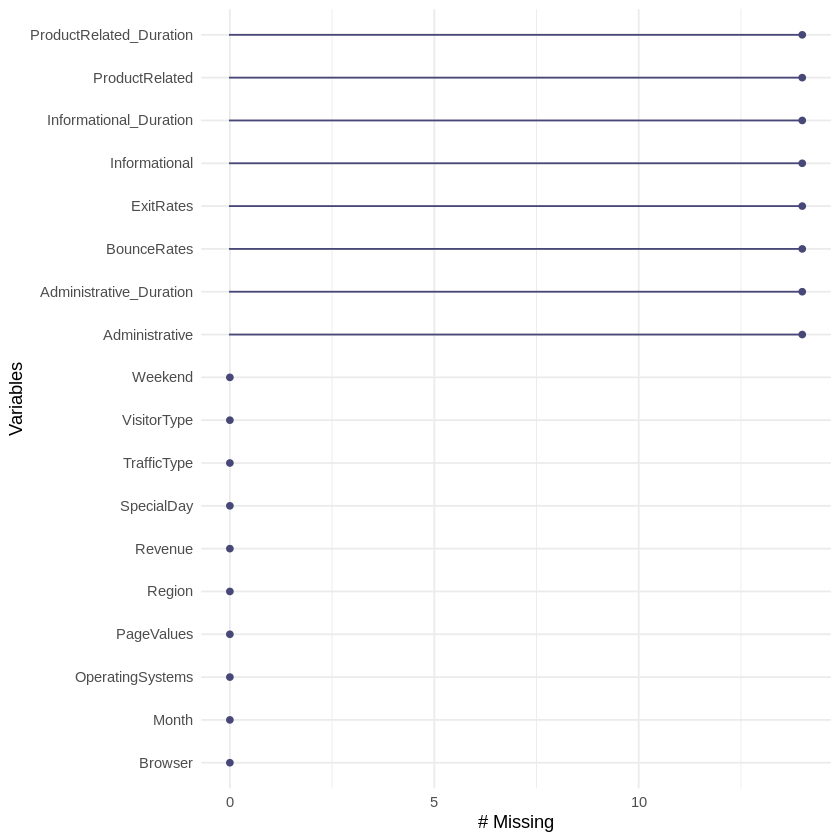

In [16]:
# Visualizing missing values

library(naniar)
gg_miss_var(data)

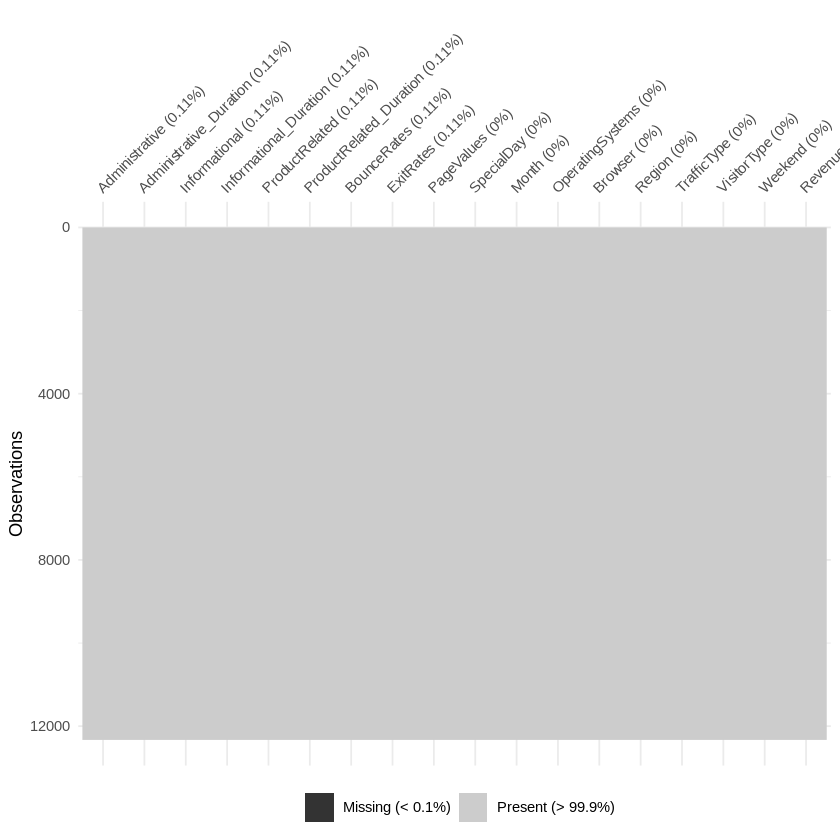

In [17]:
vis_miss(data)

In [18]:
data <- na.omit(data) 

# confirm the values have been dropped
colSums(is.na(data))

Administrative Administrative_Duration           Informational 
                      0                       0                       0 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                      0                       0                       0 
            BounceRates               ExitRates              PageValues 
                      0                       0                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

###Duplicated rows

In [22]:

duplicated_rows <- data[duplicated(data),]
head(duplicated_rows)



,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<fct>,<lgl>,<lgl>
159,0,0,0,0,1,0,0.2,0.2,0,0,Feb,1,1,1,3,Returning_Visitor,FALSE,FALSE
179,0,0,0,0,1,0,0.2,0.2,0,0,Feb,3,2,3,3,Returning_Visitor,FALSE,FALSE
419,0,0,0,0,1,0,0.2,0.2,0,0,Mar,1,1,1,1,Returning_Visitor,TRUE,FALSE
457,0,0,0,0,1,0,0.2,0.2,0,0,Mar,2,2,4,1,Returning_Visitor,FALSE,FALSE
484,0,0,0,0,1,0,0.2,0.2,0,0,Mar,3,2,3,1,Returning_Visitor,FALSE,FALSE
513,0,0,0,0,1,0,0.2,0.2,0,0,Mar,2,2,1,1,Returning_Visitor,FALSE,FALSE


In [23]:
# now gettiing the dimension of the duplicated data to actually see how mucg in 
# total is missing 
dim(duplicated_rows)

[1] 117  18

In [24]:

# pick the non-duplicated rows
data = data[!duplicated(data), ]
dim(data)


[1] 12199    18

###Outliers

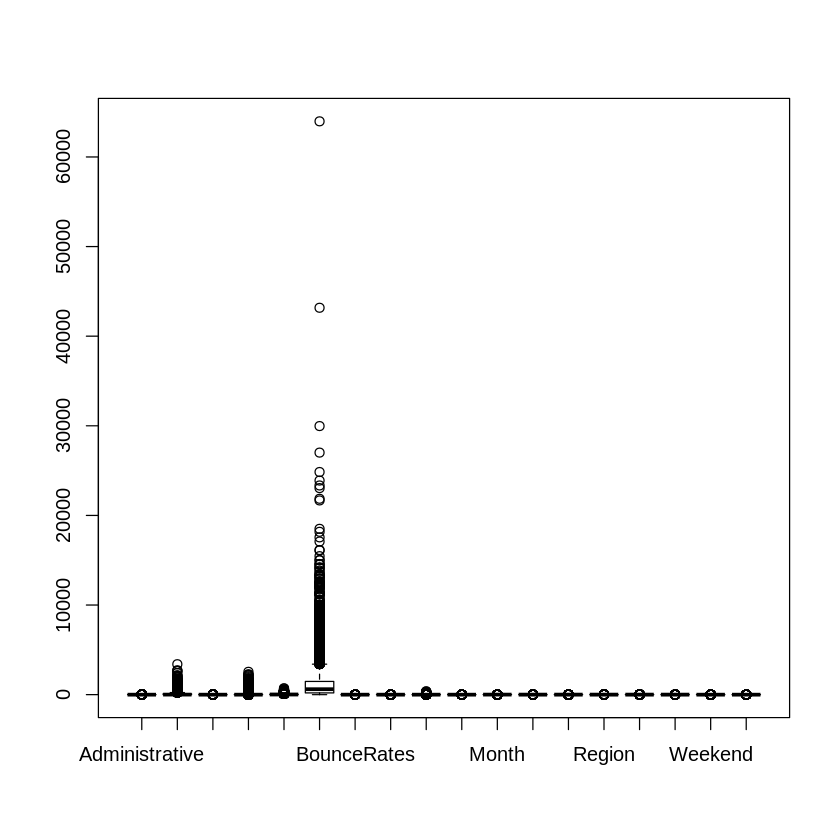

In [25]:
boxplot(data)

In [26]:
# Subset your data to numerical columns only
num <- data[, c(1,2,3,4,5,6,7,8,9,10)]
names(num)

[1] "Administrative"          "Administrative_Duration"
 [3] "Informational"           "Informational_Duration" 
 [5] "ProductRelated"          "ProductRelated_Duration"
 [7] "BounceRates"             "ExitRates"              
 [9] "PageValues"              "SpecialDay"

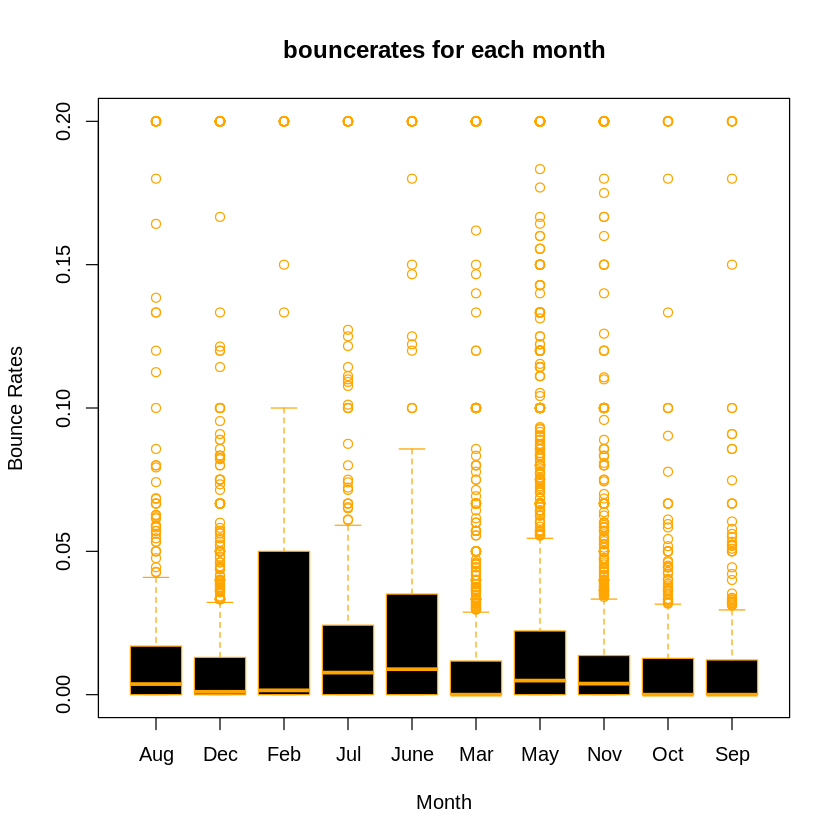

In [34]:
boxplot(BounceRates~Month,
data=data,
main="bouncerates for each month",
xlab="Month",
ylab="Bounce Rates",
col="black",
border="orange"
)

#4.Exploratory Data analysis 

##Univariate Analysis

In [36]:
install.packages("DataExplorer")
library(DataExplorer)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘igraph’, ‘data.table’, ‘reshape2’, ‘networkD3’




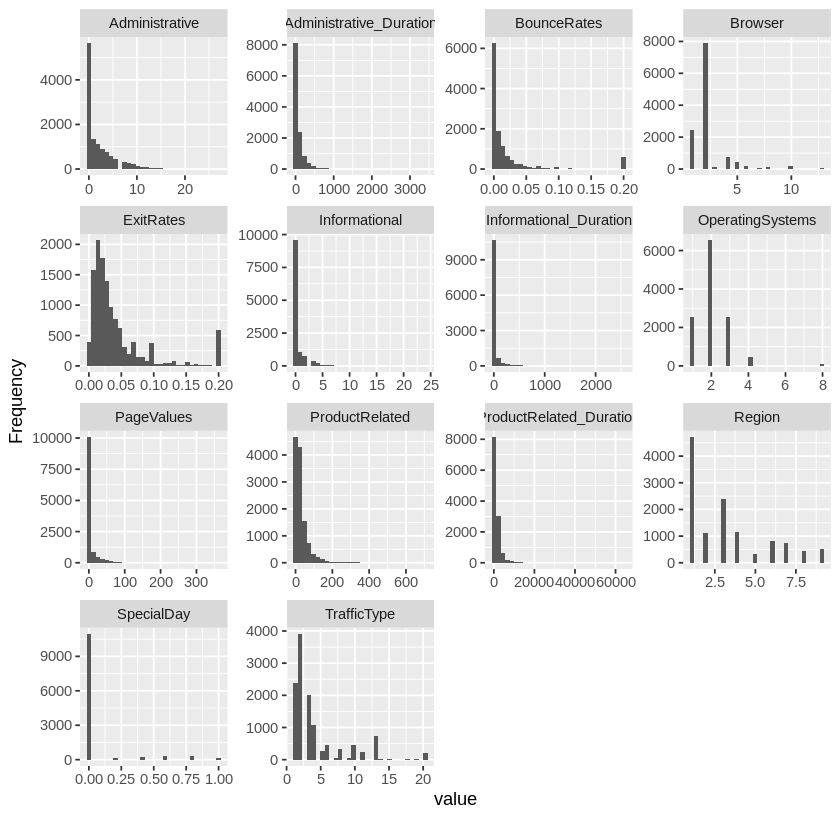

In [39]:
plot_histogram(data)



In [43]:
cat <- data[, c(11:18)]
names(cat)

[1] "Month"            "OperatingSystems" "Browser"          "Region"          
[5] "TrafficType"      "VisitorType"      "Weekend"          "Revenue"

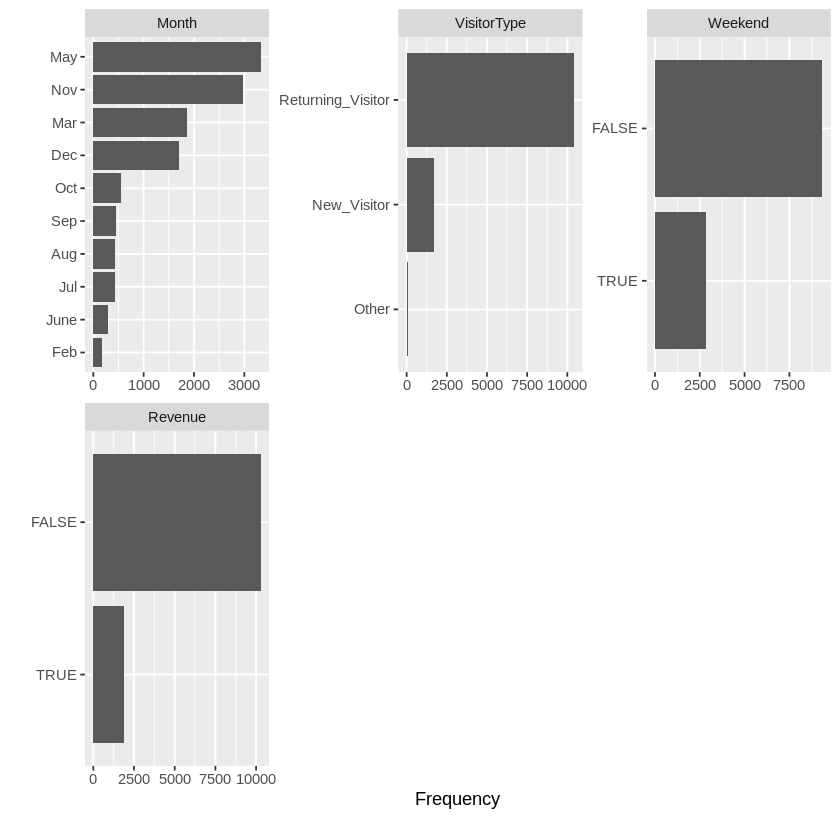

In [44]:
plot_bar(cat)

#5.Modelling 

###K-Means CLustering

In [46]:
a = c('Month','VisitorType', 'Weekend')
for (i in a){
    data[,i] = as.numeric(data[,i])
}

In [47]:
b = c("OperatingSystems", "Browser", "Region", "TrafficType")
for (i in b) {
    data[, i] = as.factor(data[, i])
}

In [48]:
data.new <- data[, c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17)]
data.class<- data[, "Revenue"]
head(data.new)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
1,0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,3,1,1,1,1,3,0
2,0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,3,2,2,1,2,3,0
3,0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,3,4,1,9,3,3,0
4,0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,3,3,2,2,4,3,0
5,0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,3,3,3,1,4,3,1
6,0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,3,2,2,1,3,3,0


In [49]:
# Normalize the data
normalize <- function(x){
  return ((x-min(x)) / (max(x)-min(x)))
}

n = c(1,2,3,4,5,6,7,8,9,10)
for (i in n){
    data.new[,i] = normalize(data.new[,i])
}

head(data.new)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
1,0,0.0002941393,0,0.0003920992,0.001418440,1.563122e-05,1.00000000,1.000000,0,0,3,1,1,1,1,3,0
2,0,0.0002941393,0,0.0003920992,0.002836879,1.016029e-03,0.00000000,0.500000,0,0,3,2,2,1,2,3,0
3,0,0.0000000000,0,0.0000000000,0.001418440,0.000000e+00,1.00000000,1.000000,0,0,3,4,1,9,3,3,0
4,0,0.0002941393,0,0.0003920992,0.002836879,5.731448e-05,0.25000000,0.700000,0,0,3,3,2,2,4,3,0
5,0,0.0002941393,0,0.0003920992,0.014184397,9.824223e-03,0.10000000,0.250000,0,0,3,3,3,1,4,3,1
6,0,0.0002941393,0,0.0003920992,0.026950355,2.426226e-03,0.07894737,0.122807,0,0,3,2,2,1,3,3,0


In [53]:
# Applying the K-means clustering algorithm with no. of centroids(k)=3
# ---
# 
final <- kmeans(data.new,2)

In [56]:
# Previewing the no. of records in each cluster
# 
final$size

[1] 10116  2083

In [58]:
final$centers

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
1,0.08831993,0.02453583,0.02185482,0.01451443,0.04622647,0.0191122,0.09381286,0.1992468,0.01639978,0.06202056,6.141459,2.069790,2.321965,3.129300,2.446619,2.719158,0.2311190
2,0.07864369,0.02327224,0.01802288,0.01180502,0.04181367,0.0178136,0.14312901,0.2474870,0.01671795,0.06173788,6.296687,2.389342,2.533845,3.269803,11.980797,2.699472,0.2486798


In [57]:
final$cluster

1     2     3     4     5     6     7     8     9    10    11    12    13 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
   40    41    42    43    44    45    46    47    48    49    50    51    52 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
   53    54    55    56    57    58    59    60    61    62    63    64    65 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
   66    67    68    69    70    71    72    73    74    75    76    77    78 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
   79    80    81    82    83    84    85    86    87    88    89    90    91 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
   92    93    94    95    96    97    98    99   100   101   102   103   104 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
  105   106   107   108   109   110   111   112   113   114   115   116   117 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
  118   119   120   121   122   123   124   125   126   127   128   129   130 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
  131   132   133   134   135   136   137   138   139   140   141   142   143 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
  144   145   146   147   148   149   150   151   152   153   154   155   156 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
  157   158   160   161   162   163   164   165   166   167   168   169   170 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
  171   172   173   174   175   176   177   178   180   181   182   183   184 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
  185   186   187   188   189   190   191   192   193   194   195   196   197 
    2     1     1     1     1     1     1     1     1     1     1     1     1 
  198   199   200   201   202   203   204   205   206   207   208   209   210 
    1     1     1     2     2     1     2     2     1     1     1     1     1 
  211   212   213   214   215   216   217   218   219   220   221   222   223 
    1     1     2     1     1     1     1     1     1     2     1     1     1 
  224   225   226   227   228   229   230   231   232   233   234   235   236 
    2     1     2     1     1     1     1     2     1     1     1     1     1 
  237   238   239   240   241   242   243   244   245   246   247   248   249 
    2     1     1     1     1     1     1     1     1     1     1     1     1 
  250   251   252   253   254   255   256   257   258   259   260   261   262 
    1     1     1     1     1     1     1     1     2     1     2     1     1 
  263   264   265   266   267   268   269   270   271   272   273   274   275 
    1     1     1     1     1     2     1     1     1     1     2     1     2 
  276   277   278   279   280   281   282   283   284   285   286   287   288 
    1     1     1     1     1     1     2     1     1     1     1     1     1 
  289   290   291   292   293   294   295   296   297   298   299   300   301 
    1     2     1     1     1     1     1     1     1     1     1     1     2 
  302   303   304   305   306   307   308   309   310   311   312   313   314 
    1     1     1     1     1     1     1     2     2     2     1     1     1 
  315   316   317   318   319   320   321   322   323   324   325   326   327 
    1     1     1     2     1     1     1     1     1     1     1     1     1 
  328   329   330   331   332   333   334   335   336 

In [63]:

data.n <- as.numeric(data.class)

mean(data.n == final$cluster)

[1] 0.1291089

Gives 12.91% accuracy 

#6.Challenging the solution 

##Hierachical Clustering

In [67]:
# data.new <- data[, c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17)]
# data.class<- data[, "Revenue"]
# 
# Calculating euclidean distances of the independent variables.

c <- dist(data.new, method = "euclidean")


In [68]:
# using the hclust clustering method.
h_model <- hclust(c, method = "ward.D2" )


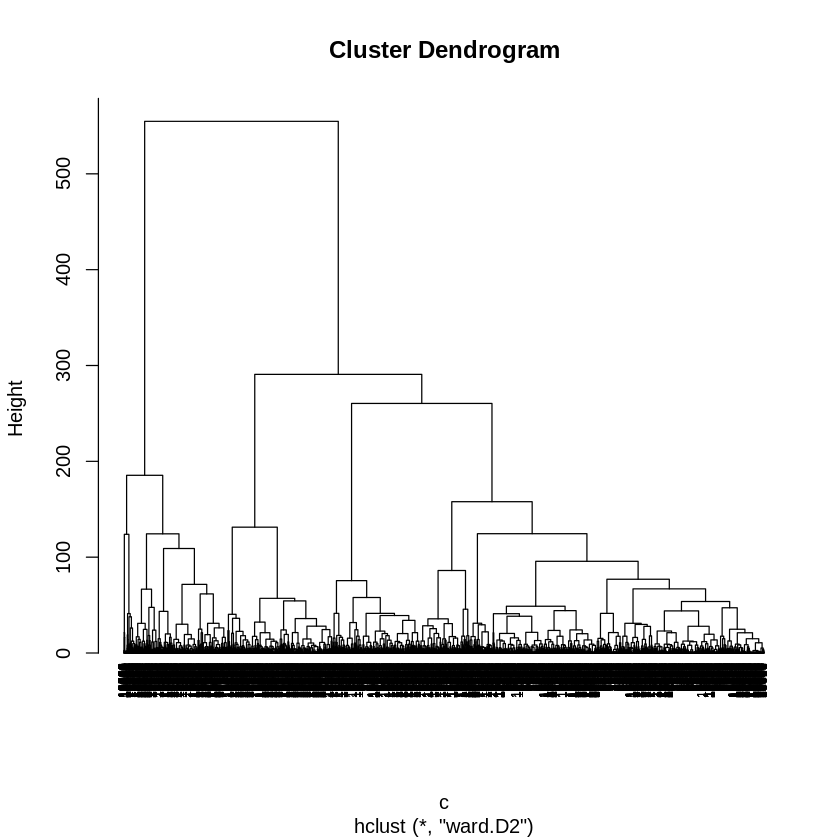

In [69]:
# Dendogram
plot(h_model, cex = 0.6, hang = -1)


In [70]:
# displaying the tree in 2 groups.
sub_group = cutree (h_model, k = 2)
table (sub_group)

sub_group
    1     2 
10224  1975 

In [71]:
table (sub_group, data.class)

         data.class
sub_group FALSE TRUE
        1  8602 1622
        2  1689  286

In [72]:
# Accuracy

mean(sub_group == data.class)

[1] 0.1329617

- An accuracy of 13.30% isSlightly higher as compared to the Kmeans clustering accuracy

#7. Conclusions and Recommendations

- Hierachical clustering performed slightly better in terms of accuracy. It is therefore recommended that the hierachical method be utilised when it comes to analytics for the data herein and future data. 
- 